<a href="https://colab.research.google.com/github/Toadoum/Machine-Learning-from-scratch/blob/main/Logistic_Regression_With_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Question 0: Import the dataset Dataset

In [ ]:
##### WRITE YOUR CODE HERE #####

data= pd.read_csv('/content/diabetes.csv')
#### END CODE ####

Question 1: Print the first five rows of the Dataset

In [ ]:
##### WRITE YOUR CODE HERE #####
data.head(5)
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [ ]:
##### WRITE YOUR CODE HERE #####
type(data.columns)
#### END CODE ####

pandas.core.indexes.base.Index

Question 3: Describe your dataset

In [ ]:
##### WRITE YOUR CODE HERE #####
data.describe()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [ ]:
##### WRITE YOUR CODE HERE #####
def feature_standard(data):
  ######## write your code #########
  dmean=np.mean(data, axis=0)
  dstd= np.mean(data, axis=0)
  data_Scaled= (data - dmean)/dstd


  return data_Scaled

#### END CODE ####

Question 5: Scale your features, except the target. 

In [ ]:
##### WRITE YOUR CODE HERE #####
Standard_data=feature_standard(data)
data.iloc[:, 0:-1]=Standard_data.iloc[:, 0:-1]
data.head()

#### END CODE #### 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.560447,0.224208,0.041886,0.704286,-1.000000,0.050244,0.328738,0.504172,1
1,-0.739925,-0.296908,-0.044938,0.412123,-1.000000,-0.168557,-0.256161,-0.067414,0
2,1.080596,0.513716,-0.073879,-1.000000,-1.000000,-0.271706,0.424102,-0.037330,1
3,-0.739925,-0.263821,-0.044938,0.119959,0.177953,-0.121671,-0.646094,-0.368248,0
4,-1.000000,0.133219,-0.421175,0.704286,1.105277,0.347187,3.848728,-0.007247,1


Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [ ]:
##### WRITE YOUR CODE HERE #####
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values
#### END CODE ####

In [ ]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [ ]:
from numpy.ma.core import reshape
class logistic_regression:
  def __init__(self, num_iters= 100, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters=num_iters
    self.threshold=threshold
    self.lr=lr
    self.tolerance=tolerance
    self.theta=None

    self.cost_history=[]
    self.cost_history_test=[]
    #### END CODE ####

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    x_new=np.hstack([np.ones((x.shape[0], 1)), x])
    return x_new
    #### END CODE ####

  def sigmoid(self, x, theta):
    ##### WRITE YOUR CODE HERE #####
    h= x@self.theta
    #print(z)
    return 1/(1+np.exp(-h))
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = len(x) # Length of x
    y_pred = self.sigmoid(x, self.theta)
    Cost = -((y_true.T@np.log(y_pred))+(1-y_true.T)@np.log(1-y_pred))/n    
    return Cost[0]
    #### END CODE ####

  def fit(self, x,y):
    ##### WRITE YOUR CODE HERE #####
    x= self.add_ones(x) # Add ones to x
    y= y.reshape(-1,1) # reshape y. This is optional, do it if needed
    self.theta= np.zeros((x.shape[1],1)) # Initialize theta to zeros vector >>> (x.shape[1])
    current_iter= 1
    norm= 1

    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta

      # make predictions
      y_pred= self.sigmoid(x,self.theta)# using sigmoid function 

      # Gradient of cross-entropy
      grad= -x.T@((y.reshape(-1,1) - y_pred.reshape(-1,1)))
      grad= grad.reshape(-1,1) # Reshape, if it is needed

      # update rules
      theta_new= theta_old-self.lr*grad
      self.theta=theta_new
      # Compute the training loss
      self.cost_history.append(self.cross_entropy(x, y))
      self.cost_history_test.append(self.cross_entropy(self.add_ones(x_test), y_test))

      # Convergence criteria:
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
    #### END CODE ####
  
  def predict(self, x):
    #x= self.add_ones(x)
    proba= self.predict_proba(x)# Get probability of x
    result= [1 if i > self.threshold else 0 for i in proba]  # Convert proba to 0 or 1. hint: list comprehension
    return np.array(result)
  
    
  def predict_proba(self, x):
      x= self.add_ones(x)
      y_pred= self.sigmoid(x,self.theta) # Apply add ones to x
      return y_pred
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.figure(figsize=(10,6))
    plt.plot(self.cost_history, label='Train Loss')
    plt.plot(self.cost_history_test, label='Test loss')
    plt.legend(loc='upper right')
    plt.style.use('ggplot')
    plt.show()

In [ ]:
# Create a model by instanciating the class logistic_regression
model = logistic_regression(num_iters=100000)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
pred= model.predict(x_test)

In [ ]:
pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Predict Proba
print(model.predict_proba(x_test))

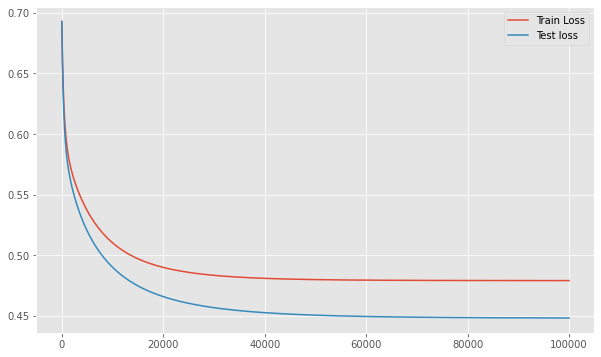

In [ ]:
model.plot()

## Push your works to Githup Repo

Setps:
1. Fork the repo: `https://github.com/AMMI-2022/test-live-coding`
2. Clone in your colab;
3. Push
4. Make a pull request

Set your credential

In [ ]:
my_token= ""
my_repository= ""
username= ""
useremail= ""

Clone the repo

In [ ]:
! git clone https://github.com/{username}/{my_repository}.git

Cloning into 'github.com'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
! git remote -v

fatal: not a git repository (or any of the parent directories): .git


Copy data to test-live-coding folder

In [ ]:
!cp diabetes.csv /content/test-live-coding

In [ ]:
%cd /content/test-live-coding

[Errno 20] Not a directory: '/content/test-live-coding'
/content


In [ ]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!git config user.email useremail
!git config user.name username

fatal: not in a git directory
fatal: not in a git directory


In [ ]:
!git add .
!git commit -m "Add my files"

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!git push -u origin master --force

fatal: not a git repository (or any of the parent directories): .git


# If you cannot push, use:

In [ ]:
!git remote rm origin

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!git remote add origin https://{my_token}@github.com/{username}/{my_repository}.git
!git remote -v

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!git push -u origin master --force

fatal: not a git repository (or any of the parent directories): .git


---



---



---

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with `l1`, `l2` and `l1-l2`. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ElasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

`Note: please use mini-batch as learning algorithm`

In [ ]:
from numpy.ma.core import reshape
class logistic_regression_l1:
  def __init__(self, x_test, y_test,num_iters= 100,l1=0.25, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters = num_iters
    self.threshold = threshold
    self.tolerance = tolerance
    self.lr = lr
    self.theta = None
    self.cost_history = []
    self.cost_history_test = []
    self.x_test = x_test
    self.y_test = y_test
    self.l1=l1
    #### END CODE ####

  def add_ones(self, x):
    new_x = np.c_[np.ones((x.shape[0],1)), x]
    return new_x
  def sigmoid(self, x):
    ##### WRITE YOUR CODE HERE #####
    z= x @ self.theta
    return 1 / (1 + np.exp(-z))
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = len(x) # Length of x
    #x = self.add_ones(x)
    y_pred = self.sigmoid(x)

    #L = (self.l2 * np.linalg.norm(self.theta, 2) + self.l1 * np.linalg.norm(self.theta, 1))
    Cost = -np.sum((y_true * np.log(y_pred))+ (1 - y_true) * np.log(1 - y_pred))  + np.linalg.norm(self.theta, 1)
        
    return Cost / n # if you want you can scale
    #### END CODE ####

  def fit(self, x,y,batch_size=128):
    ##### WRITE YOUR CODE HERE #####
    x= self.add_ones(x) # Add ones to x
    y= y.reshape(-1,1) # reshape y. This is optional, do it if needed

    self.x_test = self.add_ones(self.x_test)
    self.y_test = self.y_test.reshape(-1,1)



    self.theta= np.zeros((x.shape[1],1)) # Initialize theta to zeros vector >>> (x.shape[1])
    current_iter= 1
    norm= 1

    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta

      # make predictions
       # using sigmoid function 

      number_of_batches = len(x) // batch_size

      epoch_losses = []
      for batch_number in range(number_of_batches):
        X = x[batch_number * batch_size: (batch_number + 1) * batch_size]
        Y = y[batch_number * batch_size: (batch_number + 1) * batch_size]
        y_pred= self.sigmoid(X)
      # Gradient of cross-entropy
        grad= -X.T @ (Y - y_pred) + self.l1*np.sign(self.theta)
        grad= grad.reshape(-1,1) # Reshape, if it is needed

      # update rules
        self.theta= self.theta - self.lr * grad
      # Compute the training loss
        self.cost_history.append(self.cross_entropy(X, Y))
        self.cost_history_test.append(self.cross_entropy(self.x_test, self.y_test))

      # Convergence criteria:
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(X, Y)}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
    #### END CODE ####
  
  def predict(self, x):
    proba = self.predict_proba(x) # Get probability of x
    #result = [1 if (proba >= self.threshold) else 0]  # Convert proba to 0 or 1. hint: list comprehension
    result = np.where(proba<0.5,0,1)
    return  result
  
    
  def predict_proba(self, x):
    x= self.add_ones(x) # Apply add ones to x
    y_pred_prob= self.sigmoid(x) # Predict proba with sigmoid
    return y_pred_prob
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.figure(figsize=(10,6))
    plt.plot(self.cost_history, label='Train Loss')
    plt.plot(self.cost_history_test, label='Test loss')
    plt.legend(loc='upper right')
    plt.style.use('ggplot')
    plt.show()
    #### END CODE ####

In [ ]:
# Create a model by instanciating the class logistic_regression
model1 = logistic_regression_l1(x_test, y_test,num_iters=100000)

In [ ]:
model1.fit(x_train, y_train)

cost for 100 iteration : 0.675087479825477
cost for 200 iteration : 0.6610518698380875
cost for 300 iteration : 0.6498392021879968
cost for 400 iteration : 0.6406790336886763
cost for 500 iteration : 0.6330591223921044
cost for 600 iteration : 0.6266257586853657
cost for 700 iteration : 0.6211258628995675
cost for 800 iteration : 0.6163726501170846
cost for 900 iteration : 0.6122246533368727
cost for 1000 iteration : 0.6085724637698446
cost for 1100 iteration : 0.6053300459306457
cost for 1200 iteration : 0.6024288464914693
cost for 1300 iteration : 0.5998136650101614
cost for 1400 iteration : 0.5974396734768763
cost for 1500 iteration : 0.5952702101844913
cost for 1600 iteration : 0.5932751121780436
cost for 1700 iteration : 0.5914294331428718
cost for 1800 iteration : 0.5897124440616361
cost for 1900 iteration : 0.5881068456919645
cost for 2000 iteration : 0.5865981424584517
cost for 2100 iteration : 0.58517414106348
cost for 2200 iteration : 0.583824546544025
cost for 2300 iteration

In [ ]:
pred= model1.predict(x_test)

In [ ]:
model1.predict_proba(x_test)

array([[0.07491392],
       [0.1736324 ],
       [0.1959677 ],
       [0.06706468],
       [0.65761666],
       [0.52751669],
       [0.2643099 ],
       [0.25101927],
       [0.04682374],
       [0.21017382],
       [0.05276676],
       [0.28913263],
       [0.65048497],
       [0.02145163],
       [0.63796496],
       [0.06075231],
       [0.35124174],
       [0.49746922],
       [0.35678812],
       [0.08395403],
       [0.30612319],
       [0.49502617],
       [0.46855148],
       [0.20019566],
       [0.25678381],
       [0.80187109],
       [0.13835334],
       [0.4254293 ],
       [0.4422109 ],
       [0.23119884],
       [0.024166  ],
       [0.91777457],
       [0.08122989],
       [0.41971177],
       [0.08775694],
       [0.47976772],
       [0.72908359],
       [0.49374148],
       [0.14498229],
       [0.94904732],
       [0.10605175],
       [0.27264485],
       [0.78102785],
       [0.89519024],
       [0.2337514 ],
       [0.09015678],
       [0.27557499],
       [0.698

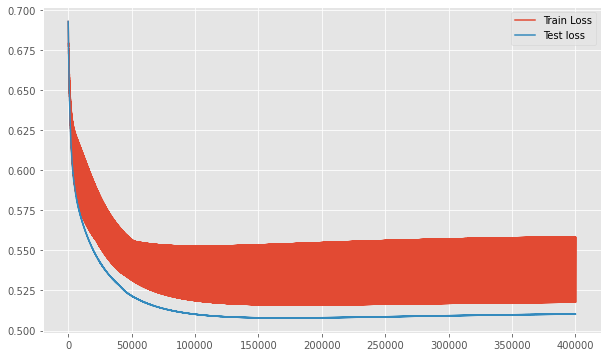

In [ ]:
model1.plot()

In [ ]:
from numpy.ma.core import reshape
class logistic_regression_l2:
  def __init__(self, x_test, y_test,num_iters= 100, l2=0.25, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters = num_iters
    self.threshold = threshold
    self.tolerance = tolerance
    self.lr = lr
    self.theta = None
    self.cost_history = []
    self.cost_history_test = []
    self.x_test = x_test
    self.y_test = y_test
    self.l2=l2
    #### END CODE ####

  def add_ones(self, x):
    new_x = np.c_[np.ones((x.shape[0],1)), x]
    return new_x
  def sigmoid(self, x):
    ##### WRITE YOUR CODE HERE #####
    z= x @ self.theta
    return 1 / (1 + np.exp(-z))
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = len(x) # Length of x
    #x = self.add_ones(x)
    y_pred = self.sigmoid(x)

    #L = (self.l2 * np.linalg.norm(self.theta, 2) + self.l1 * np.linalg.norm(self.theta, 1))
    Cost = -np.sum((y_true * np.log(y_pred))+ (1 - y_true) * np.log(1 - y_pred))  + self.l2 * np.linalg.norm(self.theta, 2)
        
    return Cost / n # if you want you can scale
    #### END CODE ####

  def fit(self, x,y,batch_size=128):
    ##### WRITE YOUR CODE HERE #####
    x= self.add_ones(x) # Add ones to x
    y= y.reshape(-1,1) # reshape y. This is optional, do it if needed

    self.x_test = self.add_ones(self.x_test)
    self.y_test = self.y_test.reshape(-1,1)



    self.theta= np.zeros((x.shape[1],1)) # Initialize theta to zeros vector >>> (x.shape[1])
    current_iter= 1
    norm= 1

    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta

      # make predictions
       # using sigmoid function 

      number_of_batches = len(x) // batch_size

      epoch_losses = []
      for batch_number in range(number_of_batches):
        X = x[batch_number * batch_size: (batch_number + 1) * batch_size]
        Y = y[batch_number * batch_size: (batch_number + 1) * batch_size]
        y_pred= self.sigmoid(X)
      # Gradient of cross-entropy
        grad= -X.T @ (Y - y_pred) + 2*self.l2*self.theta
        grad= grad.reshape(-1,1) # Reshape, if it is needed

      # update rules
        self.theta= self.theta - self.lr * grad
      # Compute the training loss
        self.cost_history.append(self.cross_entropy(X, Y))
        self.cost_history_test.append(self.cross_entropy(self.x_test, self.y_test))

      # Convergence criteria:
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(X, Y)}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
    #### END CODE ####
  
  def predict(self, x):
    proba = self.predict_proba(x) # Get probability of x
    #result = [1 if (proba >= self.threshold) else 0]  # Convert proba to 0 or 1. hint: list comprehension
    result = np.where(proba<0.5,0,1)
    return  result
  
    
  def predict_proba(self, x):
    x= self.add_ones(x) # Apply add ones to x
    y_pred_prob= self.sigmoid(x) # Predict proba with sigmoid
    return y_pred_prob
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.figure(figsize=(10,6))
    plt.plot(self.cost_history, label='Train Loss')
    plt.plot(self.cost_history_test, label='Test loss')
    plt.legend(loc='upper right')
    plt.style.use('ggplot')
    plt.show()
    #### END CODE ####

In [ ]:
model2 = logistic_regression_l2(x_test, y_test,num_iters=100000)

In [ ]:
model2.fit(x_train, y_train)

cost for 100 iteration : 0.6729341404380317
cost for 200 iteration : 0.6571172381599802
cost for 300 iteration : 0.644389868174846
cost for 400 iteration : 0.6339134226252565
cost for 500 iteration : 0.6251303372125819
cost for 600 iteration : 0.6176555141810598
cost for 700 iteration : 0.611213316964386
cost for 800 iteration : 0.6056002277759694
cost for 900 iteration : 0.6006620302530027
cost for 1000 iteration : 0.5962793789293647
cost for 1100 iteration : 0.5923583422965611
cost for 1200 iteration : 0.5888239861016339
cost for 1300 iteration : 0.585615876312118
cost for 1400 iteration : 0.5826848351988081
cost for 1500 iteration : 0.5799905426525265
cost for 1600 iteration : 0.5774997254758435
cost for 1700 iteration : 0.5751847672423942
cost for 1800 iteration : 0.5730226263506302
cost for 1900 iteration : 0.5709939845789964
cost for 2000 iteration : 0.5690825709602914
cost for 2100 iteration : 0.567274620844301
cost for 2200 iteration : 0.565558440371525
cost for 2300 iteration 

In [ ]:
pred= model2.predict(x_test)

In [ ]:
model2.predict_proba(x_test)

array([[0.10955695],
       [0.19919834],
       [0.22473263],
       [0.09694759],
       [0.6009606 ],
       [0.48511859],
       [0.26461389],
       [0.30564103],
       [0.07099011],
       [0.23220075],
       [0.07760183],
       [0.25500484],
       [0.62267637],
       [0.04281755],
       [0.60089033],
       [0.09478897],
       [0.39726574],
       [0.46184886],
       [0.37570025],
       [0.12182975],
       [0.29295525],
       [0.44818413],
       [0.46870743],
       [0.2128557 ],
       [0.30260082],
       [0.76187842],
       [0.17840656],
       [0.37804894],
       [0.42511426],
       [0.26724939],
       [0.05171865],
       [0.86713606],
       [0.11854751],
       [0.38981448],
       [0.12707933],
       [0.472785  ],
       [0.61864545],
       [0.40417041],
       [0.17249658],
       [0.90205308],
       [0.14583158],
       [0.29641737],
       [0.66856809],
       [0.85006305],
       [0.24855777],
       [0.11899258],
       [0.30714217],
       [0.656

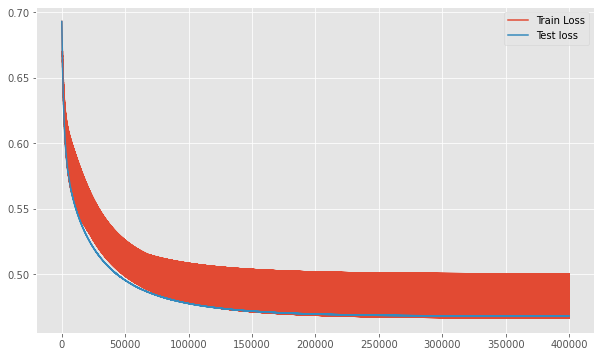

In [ ]:
model2.plot()

In [ ]:
from numpy.ma.core import reshape
class logistic_regression_l1_l2:
  def __init__(self, x_test, y_test,num_iters= 100,l1=0.8, l2=0.25, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters = num_iters
    self.threshold = threshold
    self.tolerance = tolerance
    self.lr = lr
    self.theta = None
    self.cost_history = []
    self.cost_history_test = []
    self.x_test = x_test
    self.y_test = y_test
    self.l1=l2
    self.l2=l2
    #### END CODE ####

  def add_ones(self, x):
    new_x = np.c_[np.ones((x.shape[0],1)), x]
    return new_x
  def sigmoid(self, x):
    ##### WRITE YOUR CODE HERE #####
    z= x @ self.theta
    return 1 / (1 + np.exp(-z))
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = len(x) # Length of x
    #x = self.add_ones(x)
    y_pred = self.sigmoid(x)

    #L = (self.l2 * np.linalg.norm(self.theta, 2) + self.l1 * np.linalg.norm(self.theta, 1))
    Cost = -np.sum((y_true * np.log(y_pred))+ (1 - y_true) * np.log(1 - y_pred))  +np.linalg.norm(self.theta, 1)+(self.l2 * np.linalg.norm(self.theta, 2))
        
    return Cost / n # if you want you can scale
    #### END CODE ####

  def fit(self, x,y,batch_size=128):
    ##### WRITE YOUR CODE HERE #####
    x= self.add_ones(x) # Add ones to x
    y= y.reshape(-1,1) # reshape y. This is optional, do it if needed

    self.x_test = self.add_ones(self.x_test)
    self.y_test = self.y_test.reshape(-1,1)



    self.theta= np.zeros((x.shape[1],1)) # Initialize theta to zeros vector >>> (x.shape[1])
    current_iter= 1
    norm= 1

    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta

      # make predictions
       # using sigmoid function 

      number_of_batches = len(x) // batch_size

      epoch_losses = []
      for batch_number in range(number_of_batches):
        X = x[batch_number * batch_size: (batch_number + 1) * batch_size]
        Y = y[batch_number * batch_size: (batch_number + 1) * batch_size]
        y_pred= self.sigmoid(X)
      # Gradient of cross-entropy
        grad= -X.T @ (Y - y_pred) + self.l1*np.sign(self.theta)+2*self.l2*self.theta
        grad= grad.reshape(-1,1) # Reshape, if it is needed

      # update rules
        self.theta= self.theta - self.lr * grad
      # Compute the training loss
        self.cost_history.append(self.cross_entropy(X, Y))
        self.cost_history_test.append(self.cross_entropy(self.x_test, self.y_test))

      # Convergence criteria:
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(X, Y)}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
    #### END CODE ####
  
  def predict(self, x):
    proba = self.predict_proba(x) # Get probability of x
    #result = [1 if (proba >= self.threshold) else 0]  # Convert proba to 0 or 1. hint: list comprehension
    result = np.where(proba<0.5,0,1)
    return  result
  
    
  def predict_proba(self, x):
    x= self.add_ones(x) # Apply add ones to x
    y_pred_prob= self.sigmoid(x) # Predict proba with sigmoid
    return y_pred_prob
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.figure(figsize=(10,6))
    plt.plot(self.cost_history, label='Train Loss')
    plt.plot(self.cost_history_test, label='Test loss')
    plt.legend(loc='upper right')
    plt.style.use('ggplot')
    plt.show()
    #### END CODE ####

In [ ]:
# Create a model by instanciating the class logistic_regression
model3 = logistic_regression_l1_l2(x_test, y_test, num_iters=100000)

In [ ]:
model3.fit(x_train, y_train)

cost for 100 iteration : 0.6753046569891293
cost for 200 iteration : 0.6614812150482644
cost for 300 iteration : 0.6504687634950411
cost for 400 iteration : 0.6414946569899541
cost for 500 iteration : 0.6340465616345767
cost for 600 iteration : 0.6277715833723665
cost for 700 iteration : 0.6224178173243958
cost for 800 iteration : 0.6177997596472209
cost for 900 iteration : 0.6137772126556966
cost for 1000 iteration : 0.6102419700439151
cost for 1100 iteration : 0.6071091072272782
cost for 1200 iteration : 0.6043110806847675
cost for 1300 iteration : 0.6017935972216881
cost for 1400 iteration : 0.5995126364889868
cost for 1500 iteration : 0.5974322503182344
cost for 1600 iteration : 0.5955229019879941
cost for 1700 iteration : 0.5937601915650353
cost for 1800 iteration : 0.5921238641807096
cost for 1900 iteration : 0.5905970299831266
cost for 2000 iteration : 0.589165545157661
cost for 2100 iteration : 0.5878175171978832
cost for 2200 iteration : 0.5865429070885259
cost for 2300 iterat

In [ ]:
pred= model3.predict(x_test)

In [ ]:
model3.predict_proba(x_test)

array([[0.12192033],
       [0.20991923],
       [0.22697525],
       [0.10703892],
       [0.58483652],
       [0.43886327],
       [0.26975095],
       [0.30426094],
       [0.07998678],
       [0.23150071],
       [0.0877582 ],
       [0.23775549],
       [0.61896171],
       [0.04896575],
       [0.60506788],
       [0.10551872],
       [0.3999454 ],
       [0.46687328],
       [0.38307389],
       [0.12992208],
       [0.29612392],
       [0.43198607],
       [0.46435148],
       [0.2207744 ],
       [0.30822289],
       [0.73855833],
       [0.18690721],
       [0.37674898],
       [0.4363766 ],
       [0.28341215],
       [0.05632484],
       [0.8472767 ],
       [0.12998502],
       [0.38766778],
       [0.14009351],
       [0.46918261],
       [0.59552763],
       [0.41068608],
       [0.17826701],
       [0.89200004],
       [0.15223283],
       [0.29978299],
       [0.6251812 ],
       [0.83703648],
       [0.25665872],
       [0.12854037],
       [0.3310908 ],
       [0.630

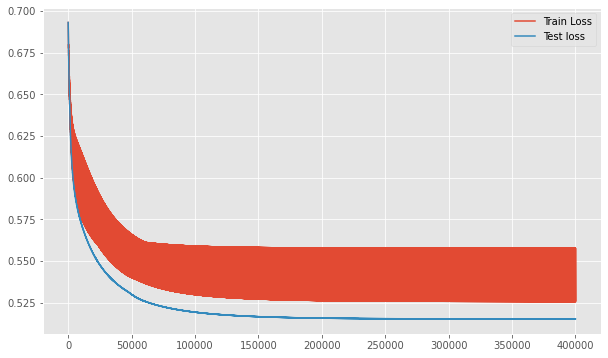

In [ ]:
model3.plot()

# Concepts [Assignment]:
1. Why there is no close form for cross-entropy loss?

The derivative of cross-entropy give:
$$\frac{∂l(θ)}{∂θ}= ∑_{i}^{} \big[y_i-\frac{1}{1+exp(-x^T_iθ)}\big]$$

Here, for each i, there is a non linear function and they are added together. There is no analytical solution(except probably a trivial situation with two observation and we have to use non linear optimization to find the estimate $\hat \theta$.

2. Why we need cross-entropy loss instead of mse?

Technically, we can use MSE for logistic regression, but the MSE is a non-convex function for binary classification. If the logistic regression is trained with MSE cost function, there is no guarantee to minimize the cost function. We also know that the loss function is the negative likekihood(NLL) of the model. To find the best parameter, we need to minimize the NLL loss. The MSE is the NLL for the linear model (with gaussian distribution). But for the logistic regression, the NLL is the cross-entropy (with Bernoulli distributrion). Hence, minimizing the MSE loss for logistic regression model is minimizing something else other than the NLL of that model

3. Why is logistic regression a type of classification technique and not a regression?

Logistic regression is a classification problem because the output belong two the binary class and the loss is the cross-entropy with a bernoulli distribution